##### Nama: Nosa Rahmanda
##### NIM: 202331195

# Import Library

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Di sini saya akan mengimport beberapa library yang diperlukan untuk menggunakan algoritma Backpropagation (BP). Secara singkat, pandas dan numpy digunakan untuk manipulasi dan analisis data, seperti mengolah data menjadi format yang sesuai untuk model. matplotlib.pyplot digunakan untuk membuat visualisasi data, misalnya grafik. Sementara itu, sklearn.preprocessing.MinMaxScaler digunakan untuk menormalisasi data agar skalanya seragam, yang penting untuk performa model deep learning. Terakhir, tensorflow.keras.models.Sequential dan tensorflow.keras.layers.Dense adalah komponen utama dari framework TensorFlow Keras yang digunakan untuk membangun model deep learning sederhana yang terdiri dari lapisan-lapisan neuron.

# Preprocessing Data

In [55]:
df = pd.read_csv('Dataset_beban_listrik.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'])
df.set_index('Tanggal', inplace=True)
df['Total_Beban'] = df.sum(axis=1)
df.head()

,Beban_Pagi,Beban_Siang,Beban_Sore,Beban_Malam,Total_Beban
Tanggal,,,,,
2025-01-01,309.934283,378.571061,446.737195,550.454902,1685.697441
2025-01-02,297.234714,373.227688,462.051352,413.492442,1546.006196
2025-01-03,312.953771,412.061810,470.704320,472.108666,1667.828567
2025-01-04,330.460597,394.413430,437.963386,520.197524,1683.034938
2025-01-05,295.316933,417.850012,456.722775,492.893412,1662.783131


Di sini saya akan melakukan preprocessing data. Kode tersebut membaca data beban listrik dari file CSV bernama Dataset_beban_listrik.csv ke dalam sebuah DataFrame pandas. Selanjutnya, kode ini mengubah kolom 'Tanggal' menjadi format tanggal dan menjadikannya sebagai indeks utama. Terakhir, kode ini membuat kolom baru bernama 'Total_Beban' yang berisi jumlah total beban listrik dari semua kolom lain pada setiap baris, lalu menampilkan lima baris pertama dari DataFrame yang sudah diubah.

# Normalisasi Data

In [58]:
scaler = MinMaxScaler()
df['Total_Beban_Scaled'] = scaler.fit_transform(df[['Total_Beban']])

Di sini saya akan melakukan normalisasi data berdasarkan dataset tadi. Kode ini menormalkan kolom Total_Beban dalam DataFrame menggunakan MinMaxScaler. Dengan kata lain, kode ini mengubah nilai-nilai dalam kolom tersebut sehingga semua nilainya berada dalam rentang 0 sampai 1. Proses ini berguna untuk memastikan semua fitur memiliki skala yang sama, sehingga model machine learning tidak memprioritaskan fitur dengan nilai numerik yang lebih besar.

# Dataset Time Series

In [63]:
def create_dataset(series, time_steps=30):
    X, y = [], []
    for i in range(len(series) - time_steps):
        X.append(series[i:i+time_steps])
        y.append(series[i+time_steps])
    return np.array(X), np.array(y)

data_series = df['Total_Beban_Scaled'].values
X, y = create_dataset(data_series, time_steps=30)

Di sini saya akan membuat function create_dataset untuk mengolah dataset time series. Kode tersebut mengambil serangkaian data, seperti seri waktu, dan memecahnya menjadi pasangan-pasangan. Untuk setiap titik data, kode tersebut membuat satu set fitur (X) dari 30 nilai sebelumnya, dan sebuah label (y) dari nilai saat ini. Dengan kata lain, kode tersebut membuat dataset di mana model machine learning dapat dilatih untuk memprediksi nilai berikutnya berdasarkan 30 nilai terakhir. Hal ini sangat berguna untuk tugas-tugas seperti memprediksi harga saham atau data cuaca.

# Split Data

In [30]:
train_size = int(len(X) * 0.9)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

Lalu, saya akan split dataset tadi. Kode tersebut berfungsi untuk membagi dataset menjadi dua set: data pelatihan (_train) dan data validasi (_val). Pertama, kode ini menghitung 90% dari total data yang ada (len(X) * 0.9) untuk dijadikan ukuran data pelatihan. Setelah itu, kode memisahkan data fitur (X) dan label (y) menjadi dua bagian. 90% data pertama akan digunakan untuk melatih model, sedangkan 10% sisanya akan digunakan untuk menguji performa model tadi.

# Model MLP

In [70]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(30,)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.4241 - val_loss: 0.1671
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1474 - val_loss: 0.0461
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0466 - val_loss: 0.0233
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0403 - val_loss: 0.0317
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0460 - val_loss: 0.0240
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0326 - val_loss: 0.0227
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0358 - val_loss: 0.0259
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0348 - val_loss: 0.0272
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0306 - val_loss: 0.0245
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0297 - val_loss: 0.0232
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0292 - val_loss: 0.0233
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0299 - val_loss: 0.0234


Setelah itu, saya akan membuat model MPL. Kode tersebut mendefinisikan dan melatih sebuah model deep learning sederhana yang terdiri dari tiga lapisan (layer) dense. Model ini menerima 30 fitur sebagai input, memprosesnya melalui dua lapisan tersembunyi dengan 64 dan 32 neuron, dan menghasilkan satu output. Model ini dikompilasi dengan optimizer 'adam' dan fungsi kerugian (loss) 'mse', kemudian dilatih menggunakan data pelatihan (X_train dan y_train) selama 100 epoch. Selama proses pelatihan, performa model juga dievaluasi menggunakan data validasi (X_val dan y_val), dan hasilnya disimpan dalam variabel history.

# Plot Loss Training & Validation

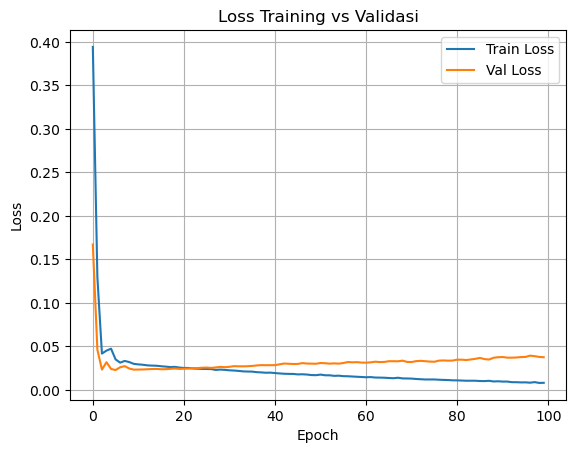

In [73]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Training vs Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Saya akan menampilkan grafik Loss Training dan Validation. Kode ini membuat sebuah plot atau grafik untuk memvisualisasikan bagaimana loss (tingkat kesalahan model) berubah selama proses pelatihan (training) dan validasi. Garis 'Train Loss' menunjukkan tingkat kesalahan pada data pelatihan di setiap epoch (satu siklus penuh data pelatihan), sementara 'Val Loss' menunjukkan tingkat kesalahan pada data validasi. Dengan melihat grafik ini, kita bisa memantau apakah model kita mengalami overfitting (bekerja terlalu baik pada data pelatihan, tapi buruk pada data validasi) atau tidak.

# Membuat Prediksi

In [36]:
last_sequence = data_series[-30:]
forecast = []

for _ in range(7):
    input_array = last_sequence.reshape(1, -1)
    pred = model.predict(input_array)[0][0]
    forecast.append(pred)
    last_sequence = np.append(last_sequence[1:], pred)

forecast_actual = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=7)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


Saya akan membuat prediksi penggunaan listrik 7 hari ke depan. Kode ini melakukan peramalan (forecasting) untuk tujuh hari ke depan menggunakan model machine learning yang sudah dilatih. Pertama, kode mengambil 30 data terakhir sebagai input (last_sequence), lalu dalam sebuah perulangan, ia memprediksi satu nilai berikutnya (pred). Hasil prediksi ini kemudian ditambahkan ke dalam daftar forecast dan juga ke last_sequence untuk digunakan sebagai input bagi prediksi selanjutnya, menciptakan efek rantai. Setelah tujuh prediksi dibuat, hasilnya dikembalikan ke skala aslinya (scaler.inverse_transform) dan tanggal untuk hasil prediksi tersebut juga dibuat (forecast_dates).

# Visualisasi Data

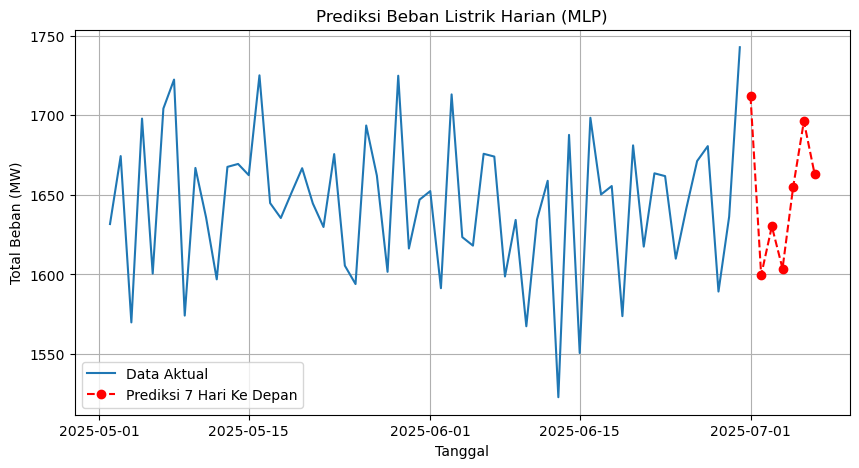

In [80]:
plt.figure(figsize=(10, 5))
plt.plot(df.index[-60:], df['Total_Beban'].values[-60:], label='Data Aktual')
plt.plot(forecast_dates, forecast_actual, 'r--o', label='Prediksi 7 Hari Ke Depan')
plt.title('Prediksi Beban Listrik Harian (MLP)')
plt.xlabel('Tanggal')
plt.ylabel('Total Beban (MW)')
plt.grid(True)
plt.legend()
plt.show()

Lalu, saya tampilkan hasil prediksinya menggunakan grafik. Kode ini menggunakan library Matplotlib untuk membuat visualisasi yang menampilkan grafik historis beban listrik harian selama 60 hari terakhir dan perbandingannya dengan prediksi beban listrik untuk 7 hari ke depan. Grafik ini menunjukkan data aktual dalam garis biru dan data prediksi dalam garis putus-putus merah, lengkap dengan judul, label sumbu X dan Y, serta legenda untuk memudahkan pembacaan, sebelum akhirnya ditampilkan di layar.

In [83]:
for tanggal, nilai in zip(forecast_dates, forecast_actual.flatten()):
    print(f'Prediksi tanggal {tanggal.date()}: {nilai:.2f} MW')

Prediksi tanggal 2025-07-01: 1711.88 MW
Prediksi tanggal 2025-07-02: 1599.49 MW
Prediksi tanggal 2025-07-03: 1630.19 MW
Prediksi tanggal 2025-07-04: 1603.70 MW
Prediksi tanggal 2025-07-05: 1655.07 MW
Prediksi tanggal 2025-07-06: 1696.19 MW
Prediksi tanggal 2025-07-07: 1663.31 MW
